# MULTILAYER PERCEPTRON

##### Alternativa para usar em problemas não linearmente dependentes -> Ao inves do Perceptron que permitia apenas uma divisão por uam reta, no MLP eu consigo traçar varias retas para separar meus dados (não linearmente separaveis)

##### As saídas da camada de entrada passam por uma função de ativação nas camadas ocultas (função não linear que varia de 0 a 1 como por exemplo a função sigmoidal), na saída temos a função de ativação linear somatorio dos pesos para aí então calcular o valor da camada de saída*



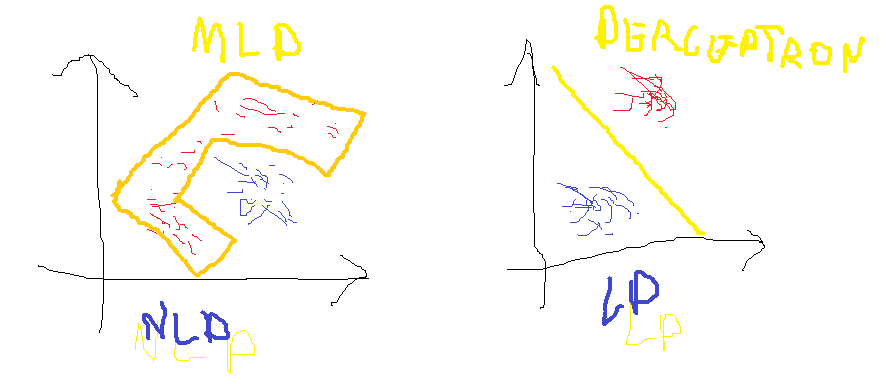


#### Para dados tabulares (planilhas) um ou no máximo duas camaas é suficiente porém para dados como imagem, som, video é necessarios aplicar mais camadas (deep learning)
#### Para classificação, utilizamos a camada de saída com mais de um neuronio como na figura acima. Dois neuronios nesse caso nos retornara 00 (classe 2) ou 01 (classe 1) pois na saída das camadas intermediarias teremos um retorno em 0 ou 1 porcausa da função de ativação linear (normalmente a identidade)
#### Para regressão basta um neuronônio, pois ele retorna o somatorio dos pesos em inves de utilizar a função de ativação linear

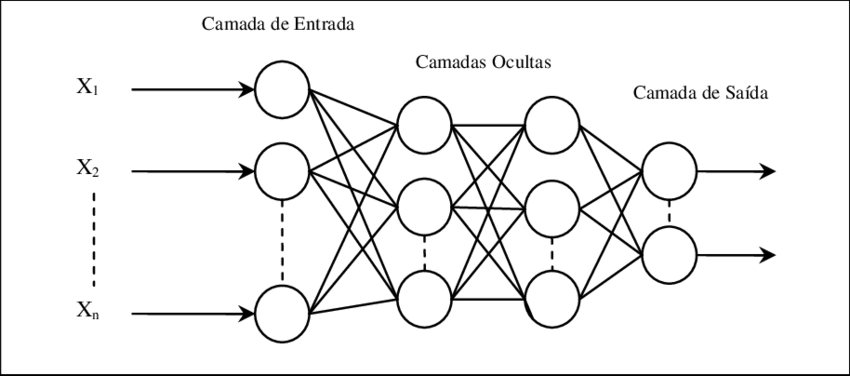

#### O MLP calcula primeiro na fase foward todos os pesos até a saída. E aplica uma regra delta generelizada (como na  regra dpo gradiente do ADALINE) para calcular o erro nos pesos.  O erro é propagado de volta pelas camadas, ajustando os pesos das conexões de forma a diminuir o erro na próxima iteração (backpropagation). Dessa forma minimizando o erro, tentnado corrigir os pesos


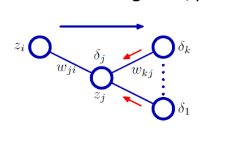

O backpropagation calcula o gradiente do erro em relação aos pesos da rede neural. O gradiente indica a direção na qual o erro muda mais rapidamente.
O algoritmo então atualiza os pesos na direção oposta ao gradiente, com o objetivo de diminuir o erro.
Esse processo é repetido iterativamente até que o erro converja para um valor mínimo. Seja porcausa da quantidade de iterações vai ter uma hora que o backporpagation vai chegar em um minimo local daquel espaço.

Ou seja, se o erro estiver descendo, ele vai manter a descida, se o erro estiver subindo, ele vai fazer o erro descer através da mudança nos pesos. Isso por n iterações pré-definidas.

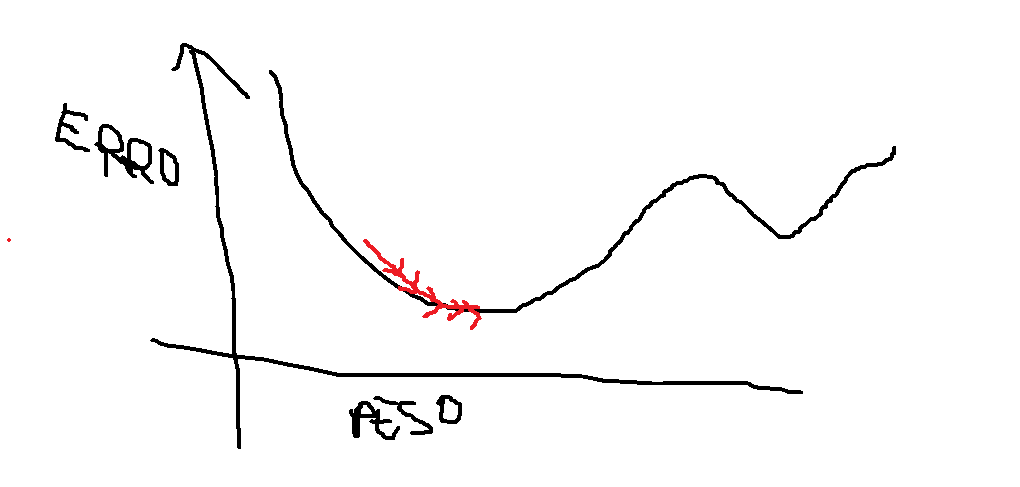

 Porém seguindo esse método ele pode acabar em um minimo local e não em um minimo global a depender da inicialização dos pesos, da taxa de aprendizagem e do número de iterações da minha rede neural. A estagnação em um mininmo local pode correr em um ou mais pesos.

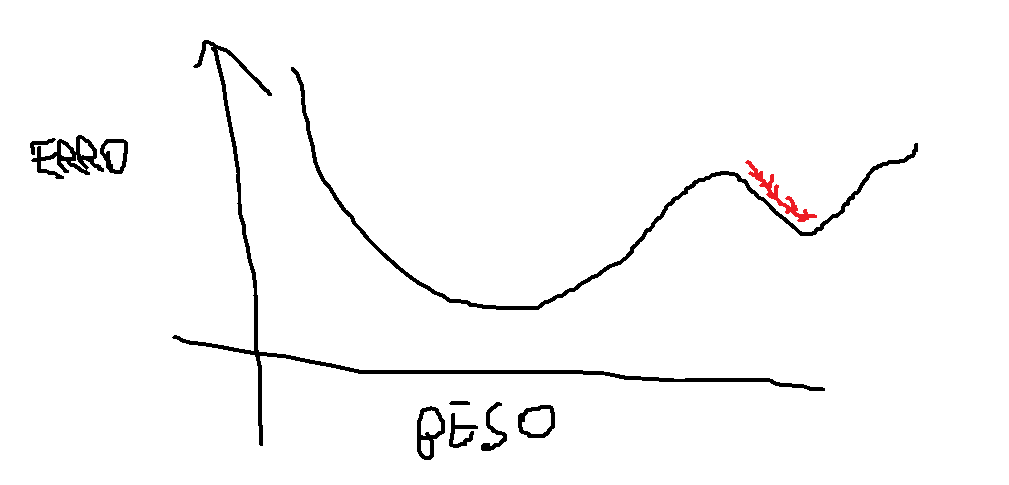

Para resolver  problema de estagnação em um minimo local eu posso adicionar um "momento" nos pesos quantificando a variação dos pesos entre o ciclo atual e o anterior evitando o minimo local, porém ele ainda pode vitar um minimo global dessa forma. Ele nota variação do hgradiente para baixo e dá um impulso nessa direção, dessa forma podendo evitar minimos locais.

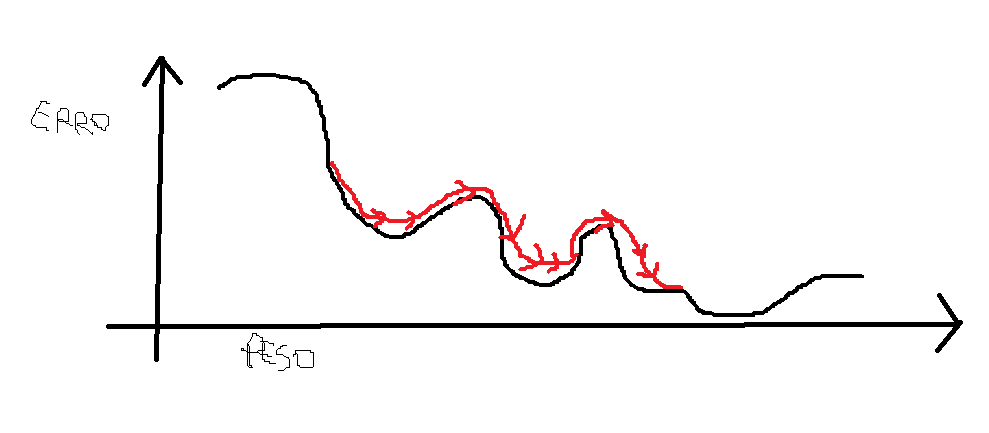

In [10]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score


listagem=[]
iter=0
while iter < 30 : # Roda trinta vezes para observar os valores


  X = pd.read_excel('wine.xlsx')


  sd=30  # A semente serve para manter a aleatorização consistente, mantendo a forma de como a aleatorização é feita mantendo uma efeito de comparatibilidade entre os resultados
  random.seed(sd) # roda 30 vezea, alterando o valor do seed para cada execução

  rand_indexes = list(np.random.choice(len(X), len(X), replace=False)) # Embaralha as linhas do datset aleatoriamente , isso é feito para garantir uma melhor distribuição dos dados/target
  X_shuff=X.iloc[rand_indexes,:] # .iloc[seleção de linhas, seleção de colunas] -> A seleção de linhas siginfica estar selecionando as linhas de acordo com os indexes aleatorios da lista rand_indexes e o : signfica a seleção de todas as colunas correspondentes a essas linhas

  #train,valid,test split


  #Divisão do dataset em 60% para treino, 20% para validação e 20% para teste

  train = 0.6
  valid = 0.2


  train_i = int(train*len(X)) # numero de linhas do dataset * 0.6 -> nesse caso 178*0.6 e trunca paa o inteiro mais proximo -> 106
  valid_i = int(valid*(len(X))) # numero de linhas do dataset * 0.2 -> nesse caso 178*0.2 e trunca paa o inteiro mais proximo -> 35

  # Divisão para o Treinamento da rede neural

  train_input = X_shuff.iloc[0:train_i,1:] # Entrada do Treinamento -> [seleção de linhas, seleção de colunas] ->  0: train_i (seleciona da linha 0 até train_i=106-1= linha 105 ) &  1: (seleciona todas as colunas apartir da linha 1)
  train_target = X_shuff.iloc[0:train_i,0] # Target do Treinamento (Classes ) -> [seleção de linhas, seleção de colunas] ->  0: train_i (seleciona da linha 0 até train_i=106-1 linha 105 ) &  0 (seleciona aopenas a coluna 0)

  # Divisão para a Validação do Treinamento da rede neural

  valid_input = X_shuff.iloc[train_i:train_i+valid_i,1:] # Entrada da Validação -> [seleção de linhas, seleção de colunas] ->  train_i :train_i+valid_i (seleciona apartir da linha train_i=106 até a linha train_i+valid_i=106+35-1 = linha 140 ) &  1: (seleciona todas as colunas apartir da linha 1)
  valid_target = X_shuff.iloc[train_i:train_i+valid_i,0]  # Target da Validação (Classes ) -> [seleção de linhas, seleção de colunas] -> train_i :train_i+valid_i (seleciona apartir da linha train_i=106 até a linha train_i+valid_i=106+35-1 = linha 140 ) &  0 (seleciona aopenas a coluna 0)

  # Divisão para o Teste do Modelo da rede neural

  test_input = X_shuff.iloc[train_i+valid_i:,1:]  # Seleciona a coluna 1 em diante aprtir da linha 141 (106 (train_i) + 35 (valid_i) ) até a linha final do dataset (nesse caso 178) para pegar os parametros do teste do modelo
  test_target = X_shuff.iloc[train_i+valid_i:,0]  # Seleciona apenas a coluna 0 da linha 141 em diante para pegar apenas as classes de teste


  #Select parameters
  #gridsearchCV
  solver='sgd' # gradiente dscendente (regra delta)
  hiden_neurons = [10,20,30,40] # Quantidade de neuronios escondidos
  learning_rate = [0.1,0.01,0.001] # Taxa de aprendizagem do modelo -> "passos que o modelo ao receber o erro e comparar os pesos"
  activation=['relu','logistic','tanh'] # Função de ativação da camada escondida -> funções não lineares


  accuracytop = 0.0
  bestrna=0

  # O laço triplo testa cada possibilidade de neuronios escondidos, taxa de3 apredizado e função de ativação -> #[[10, 0.1, 'relu'],[10, 0.1, 'logistic']... [40, 0.001, 'tanh']]

  for h in hiden_neurons:
    for l in learning_rate:
      for a in activation:
        rna = MLPClassifier(hidden_layer_sizes=(h,),learning_rate_init=l,activation=a,shuffle=False) # Cria base da rede neural
      # hidden_layer_sizes -> numero de neuronios escondidos -> (h, ) siginfica que tem apenas uma camada de neuronios escondidos -> para duas camadas seria (h_camada1, h_camada2)
      # learning_rate_init -> taxa de aprendizagem
      # activaton -> função de ativação
      # suffle= false se eu fizesse como true, eu não precisaria fazer a aletaroizaçãoq ue fiz no inicio do codigo -> embaralha os dados de treinamento
        rna.fit(train_input,train_target) # .fit treina a rede neural com base nos dados de treinamento

        preds = rna.predict(valid_input)  # .predict realiza a predição com base nos dados de entrada de validação
        acc=accuracy_score(preds,valid_target) # compara os valores previstos usandos com base na entrada dos dados de validação, copmparando eles com os valores reais das classes (target de validação)

        if acc>accuracytop: # armazena o melhor modelo com base na melhor acuracia
          bestrna=rna
          accuracytop=acc

  pred_test = bestrna.predict(test_input) # Calcula um predict com base nos valores d eentrada dos dados de teste do modelo
  acc_test = accuracy_score(pred_test,test_target) # Calcula a curacia com base nas classes/saidas reais do dados de teste

  listagem.append([acc_test, bestrna])
  iter+=1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [11]:
listagem

[[0.9459459459459459,
  MLPClassifier(activation='logistic', hidden_layer_sizes=(10,),
                learning_rate_init=0.01, shuffle=False)],
 [0.918918918918919,
  MLPClassifier(activation='logistic', hidden_layer_sizes=(30,),
                learning_rate_init=0.01, shuffle=False)],
 [0.918918918918919,
  MLPClassifier(activation='logistic', hidden_layer_sizes=(20,),
                learning_rate_init=0.01, shuffle=False)],
 [0.972972972972973,
  MLPClassifier(hidden_layer_sizes=(30,), learning_rate_init=0.01, shuffle=False)],
 [0.918918918918919,
  MLPClassifier(activation='logistic', hidden_layer_sizes=(10,),
                learning_rate_init=0.01, shuffle=False)],
 [0.8918918918918919,
  MLPClassifier(activation='tanh', hidden_layer_sizes=(10,),
                learning_rate_init=0.01, shuffle=False)],
 [0.972972972972973,
  MLPClassifier(activation='logistic', hidden_layer_sizes=(40,),
                learning_rate_init=0.01, shuffle=False)],
 [1.0,
  MLPClassifier(activation